# Краткое описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 
Задача — разобраться в причинах и помочь компании выйти в плюс.

# Цель проекта:
- изучить откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

# Описание данных

В нашем распоряжении три датасета о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
1. `visits_info_short.csv` — хранит  лог сервера с информацией о посещениях сайта; 
2. `orders_info_short.csv` — информацию о заказах за этот период;
3. `costs_info_short.csv` — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура orders_info_short.csv:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура costs_info_short.csv:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

# План работы
1. Загрузить данные и подготовьте их к анализу;
2. Задайть функции для расчёта и анализа LTV, ROI, удержания и конверсии;
3. Провести исследовательский анализ данных;
4. Провести анализ затрат;
5. Оценить окпаемость рекламы
6. Написать выводы. 

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `../datasets/visits_info_short.csv`
- заказы: `../datasets/orders_info_short.csv`
- расходы: `../datasets/costs_info_short.csv`

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
visits = pd.read_csv('../datasets/visits_info_short.csv')
orders = pd.read_csv('../datasets/orders_info_short.csv')
costs = pd.read_csv('../datasets/costs_info_short.csv')

In [3]:
# функция для получения общей информации по датасету
def get_info(df):
    display(df.head())
    display(df.tail())
    print(df.info())
    display(df.describe(include='all', datetime_is_numeric=True))
    print('\nКоличество дубликатов:\n', df.duplicated().sum())
    print('\nКоличество пустых:\n', df.isna().sum())

In [4]:
# информации по датасету visits
get_info(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,User Id,Region,Device,Channel,Session Start,Session End
count,3.099010e+05,309901,309901,309901,309901,309901
unique,NaN,4,4,11,306813,306793
top,NaN,United States,iPhone,organic,2019-06-27 14:56:41,2019-07-16 02:23:30
freq,NaN,207327,112603,107760,3,3
mean,4.997664e+11,NaN,NaN,NaN,NaN,NaN
std,2.887899e+11,NaN,NaN,NaN,NaN,NaN
min,5.993260e+05,NaN,NaN,NaN,NaN,NaN
25%,2.493691e+11,NaN,NaN,NaN,NaN,NaN
50%,4.989906e+11,NaN,NaN,NaN,NaN,NaN
75%,7.495211e+11,NaN,NaN,NaN,NaN,NaN



Количество дубликатов:
 0

Количество пустых:
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


#### На основании общей информации по датафрейму visits сделал следующие выводы:
1. В visits дубликатов и пустых нет.
2. Преобразовать названия столбцов:
    1. привести к нижнему регистру,
    2. убрать пробелы из названия. 
3. Session Start и Session End необходимо перевести в формат datetime
4. Проверить неявные дубликаты в столбцах 'Region', 'Device', 'Channel'


In [5]:
# приведем названия столбцов к нижнему регистру 
visits.columns = map(str.lower, visits.columns)

# пробелы заменим нижним подверкиванием 
visits.columns = visits.columns.str.replace(' ', '_')
# посмотрим изменения 
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [6]:
# session_start и session_end переводим в формат datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# посмотрим неявные дубликаты в столбцах 'Region', 'Device', 'Channel'
for i in ['region', 'device', 'channel']:
    print(visits[i].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Неявных дубликатов нет

In [8]:
# информации по датасету orders
get_info(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,User Id,Event Dt,Revenue
count,4.021200e+04,40212,40212.000000
unique,NaN,40163,NaN
top,NaN,2019-10-26 06:49:22,NaN
freq,NaN,2,NaN
mean,4.990295e+11,NaN,5.370608
std,2.860937e+11,NaN,3.454208
min,5.993260e+05,NaN,4.990000
25%,2.511324e+11,NaN,4.990000
50%,4.982840e+11,NaN,4.990000
75%,7.433327e+11,NaN,4.990000



Количество дубликатов:
 0

Количество пустых:
 User Id     0
Event Dt    0
Revenue     0
dtype: int64


#### На основании общей информации по датафрейму orders сделал следующие выводы:
1. В orders дубликатов и пустых нет.
2. Преобразовать названия столбцов:
    1. привести к нижнему регистру,
    2. убрать пробелы из названия. 
3. Event Dt необходимо перевести в формат datetime
4. Проверить макс в Revenue, возможно ошибка ввода данных, т.к. от мин до 75% 4,99, а макс 49,99. 

In [9]:
# приведем названия столбцов к нижнему регистру 
orders.columns = map(str.lower, orders.columns)

# пробелы заменим нижним подверкиванием 
orders.columns = orders.columns.str.replace(' ', '_')
# посмотрим изменения 
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [10]:
# event_dt переводим в формат datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [11]:
orders.sort_values(by='revenue', ascending = False)

,user_id,event_dt,revenue
13448,642375035115,2019-08-20 20:45:52,49.99
33770,185750501812,2019-08-22 16:24:00,49.99
16156,607666662521,2019-09-04 19:56:23,49.99
31627,649616333931,2019-07-24 19:44:44,49.99
28408,905723035964,2019-05-20 05:12:57,49.99
...,...,...,...
13687,942039746295,2019-08-21 17:34:06,4.99
13688,784629746709,2019-08-21 12:26:17,4.99
13689,903005757588,2019-08-21 09:42:32,4.99
13690,577648187100,2019-08-21 05:30:56,4.99


<AxesSubplot: >

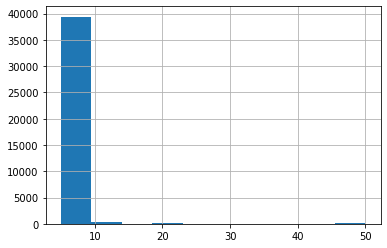

In [12]:
orders['revenue'].hist(bins=10)

In [13]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Выбросы есть, но сделать вывод на удаление не хватает информации, оставим без изменений. 

In [14]:
# информации по датасету costs
get_info(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


,dt,Channel,costs
count,1800,1800,1800.000000
unique,180,10,NaN
top,2019-05-01,FaceBoom,NaN
freq,10,180,NaN
mean,NaN,NaN,58.609611
std,NaN,NaN,107.740223
min,NaN,NaN,0.800000
25%,NaN,NaN,6.495000
50%,NaN,NaN,12.285000
75%,NaN,NaN,33.600000



Количество дубликатов:
 0

Количество пустых:
 dt         0
Channel    0
costs      0
dtype: int64


#### На основании общей информации по датафрейму costs сделал следующие выводы:
1. В costs дубликатов и пустых нет.
2. Преобразовать названия столбцов:
    1. привести к нижнему регистру,
3. dt необходимо перевести в формат date
4. Посмотреть выбросы по столбцу costs

In [15]:
# приведем названия столбцов к нижнему регистру 
costs.columns = map(str.lower, costs.columns)
# посмотрим изменения 
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [16]:
# dt переведем в формат date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


<AxesSubplot: >

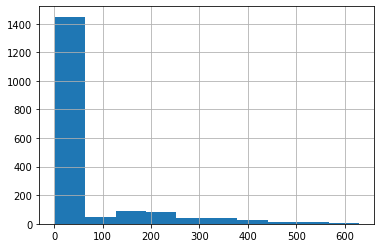

In [17]:
# посмтрим выбросы по столбцу costs
costs['costs'].hist(bins=10)

Выбросы есть, но сделать вывод на удаление не хватает информации, оставим без изменений. 

# Выводы по анализу общей информации данных
1. По датафрейму `visits`:
    1. Преобразовал названия столбцов к нижнему регистру и убрал пробелы; 
    2. Столбцы `session_start` и `session_end` перевел в формат *datetime*

2. по датафрейму `orders`:
    1. Преобразовал названия столбцов к нижнему регистру и убрал пробелы; 
    2. Столбец `event_dt` перевел в формат *datetime*

3. по датафрейму `costs`:
    1. Преобразовал названия столбцов к нижнему регистру;
    3. Столбец `dt` перевел в формат *date*

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### get_profiles() — для создания профилей пользователей,

In [18]:
# функция get_profiles() — для создания профилей пользователей,
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # возвращаем профили с CAC

#### get_retention() — для подсчёта Retention Rate

In [19]:
# функция get_retention() — для подсчёта Retention Rate

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

#### функция get_conversion() — для подсчёта конверсии

In [20]:
# функция get_conversion() — для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### get_ltv() —  для расчёта LTV и ROI

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### filter_data() — для сглаживания данных

In [22]:
# filter_data() — для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### plot_retention() — для построения графика Retention Rate

In [23]:
# plot_retention() — для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### plot_conversion() — для построения графика конверсии

In [24]:
# plot_conversion() — для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### plot_ltv_roi — для визуализации LTV и ROI

In [25]:
# plot_ltv_roi — для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [26]:
# составим профили пользователей благодаря функции get_profiles
profiles = get_profiles(sessions=visits, orders=orders, events=[], ad_costs=costs, event_names=[])
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Лучше изменить функцию get_profiles убрав из нее events.
</div>

In [27]:
#  найдем минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения', profiles['dt'].min())
print('Максимальная дата привлечения', profiles['dt'].max())

Минимальная дата привлечения 2019-05-01
Максимальная дата привлечения 2019-10-27


#### У нас есть данные о пользователях, привлечённых с 1 мая 2019 года по 27 октября 2019 года, что подтверждает описание проекта. 

In [28]:
# Выясним, из каких стран пользователи приходят в приложение
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [29]:
# и на какую страну приходится больше всего платящих пользователей.
data_reg_payers_true = profiles.query('payer == True').pivot_table(index='region', values='user_id', aggfunc='count').rename(columns={'user_id':'users_payer'}).sort_values(by='users_payer', ascending=False)
data_reg_payers_true

,users_payer
region,
United States,6902
UK,700
France,663
Germany,616


In [30]:
#  Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
data_users_shape = profiles.pivot_table(index='region', aggfunc={'user_id':'count', 'payer':'mean'}).\
    rename(columns={'user_id':'total_users', 'payer':'shape_payer'})
data_users_shape.sort_values(by='shape_payer', ascending=False)

,shape_payer,total_users
region,,
United States,0.069019,100002
Germany,0.041119,14981
UK,0.039829,17575
France,0.037994,17450


#### страны пользователей приложения
1. Пользователи приходят в приложение из стран: United States, France, Germany и UK
2. Больше всего платящих клиентов из 'United States'
3. По доле платящих клиентов также лидирует клиенты из 'United States'

In [31]:
# Узнаем какими устройствами пользуются клиенты:
profiles['device'].unique()    

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [32]:
# какие устройства предпочитают платящие пользователи
data_device_payers_true = profiles.query('payer == True').pivot_table(index='device', values='user_id', aggfunc='count').rename(columns={'user_id':'users_payer'}).sort_values(by='users_payer', ascending=False)
data_device_payers_true

,users_payer
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


In [33]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
data_device_users_shape = profiles.pivot_table(index='device', aggfunc={'user_id':'count', 'payer':'mean'}).\
    rename(columns={'user_id':'total_users', 'payer':'shape_payer'})
data_device_users_shape.sort_values(by='shape_payer', ascending=False)

,shape_payer,total_users
device,,
Mac,0.063644,30042
iPhone,0.062079,54479
Android,0.058518,35032
PC,0.050468,30455


#### устройства пользователей приложения
1. Пользователи пользуються устройствами на:
    1. 'Mac'
    2. 'iPhone'
    3. 'PC'
    4. 'Android'
2. Больше всего платящих клиентов пользователей 'iPhone' 
3. По доле платящих клиентов лидирует клиенты из 'Mac' с 6.36% , немного отстает 'iPhone' 6.21%

In [34]:
# Изучим рекламные источники привлечения
profiles['channel'].unique()    

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [35]:
# определим каналы, из которых пришло больше всего платящих пользователей
data_channel_payers_true = profiles.query('payer == True').pivot_table(index='channel', values='user_id', aggfunc='count').rename(columns={'user_id':'users_payer'}).sort_values(by='users_payer', ascending=False)
data_channel_payers_true

,users_payer
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


In [36]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
data_channel_users_shape = profiles.pivot_table(index='channel', aggfunc={'user_id':'count', 'payer':'mean'}).\
    rename(columns={'user_id':'total_users', 'payer':'shape_payer'})
data_channel_users_shape.sort_values(by='shape_payer', ascending=False)

,shape_payer,total_users
channel,,
FaceBoom,0.122049,29144
AdNonSense,0.113402,3880
lambdaMediaAds,0.104700,2149
TipTop,0.096007,19561
RocketSuperAds,0.079137,4448
WahooNetBanner,0.052964,8553
YRabbit,0.038265,4312
MediaTornado,0.035747,4364
LeapBob,0.030633,8553


#### рекламные источники привличения
1. Имеем 11 источников привличения: 
    1. *FaceBoom*
    2. *organic*
    3. *AdNonSense*
    4. *YRabbit*
    5. *MediaTornado*
    6. *RocketSuperAds*
    7. *LeapBob*
    8. *TipTop* 
    9. *WahooNetBanner*
    10. *OppleCreativeMedia* 
    11. *lambdaMediaAds*

2. Тройка лидеров источников привличения платящих клиентов:
    1. FaceBoom - 3557
    2. TipTop - 1878
    3. organic - 1160
3. По доле платящих клиентов лидеры:
    1. FaceBoom - 0.122049
    2. AdNonSense - 0.113402
    3. lambdaMediaAds - 0.104700

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [37]:
# Посчитаем общую сумму расходов на маркетинг
print('Общая сумма расходов на маркетинг составляет:', round(costs['costs'].sum(),2))

Общая сумма расходов на маркетинг составляет: 105497.3


#### Общая сумма расходов на маркетинг составляет: 105497.3

In [38]:
# Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник
data_channel_cost = costs.groupby('channel').sum().sort_values(by='costs', ascending=False)
data_channel_cost['shape_costs'] = data_channel_cost['costs'] / data_channel_cost['costs'].sum()
data_channel_cost

,costs,shape_costs
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


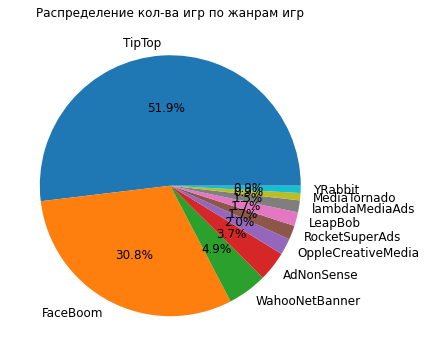

In [39]:
costs.groupby('channel').sum().sort_values(by='costs', ascending=False)['costs'].plot(kind = 'pie', 
                             title = 'Распределение кол-ва игр по жанрам игр', autopct='%1.1f%%', fontsize=12, 
                             figsize = (6, 6), legend=False);
plt.axis('off');

#### Тройка лидеров рекламных источников:

|channel	|costs	|shape_costs	|
|:----|:----:|:----:|
|TipTop|	54751.30|	0.518983|
|FaceBoom	|32445.60	|0.307549|
|WahooNetBanner	|5151.00|	0.048826|

Первые два места идут с большим отрвыом от третьего и составляют 82.7% от общей суммы реклаиных затрат.

In [40]:
# Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
# добавим столбцы в costs week и month для визуализацию
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month


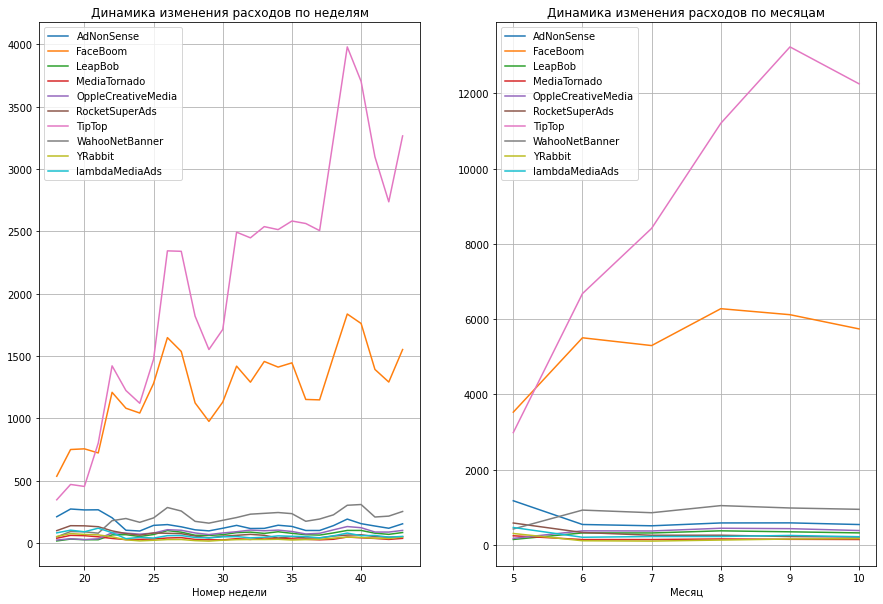

In [41]:
# Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum').T.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Номер недели')
plt.title('Динамика изменения расходов по неделям');
ax2 = plt.subplot(1, 2, 2)
costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum').T.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов по месяцам');

#### График подтверждает основные затраты на двух рекламных источниках: TipTop и FaceBoom.
Если в начале исследуемого периода затраты были выше у FaceBoom, то с 21 недели или с 6 месяца затраты выше стали у TipTop и продолжают расти более выскоми темпами. 
Остальные источники ведут себя более равномерно на всем исследуемом периоде. Небольшие изменения с 23 недели или с 6 месяца, а дальше равномерные затраты.  

In [42]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).rename(columns={'acquisition_cost':'CAC'}).sort_values(by='CAC', ascending=False)

,CAC
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [43]:
cac_total = profiles['acquisition_cost'].mean()
print('CAC общий:', f'{cac_total:.4}')

CAC общий: 0.7033


#### Тройка лидеров по привлечению одного пользователя (CAC):
1. TipTop	- 2.799003
2. FaceBoom	 - 1.113286
3. AdNonSense - 1.008054

Затраты в TipTop выше общего в 4 раза. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

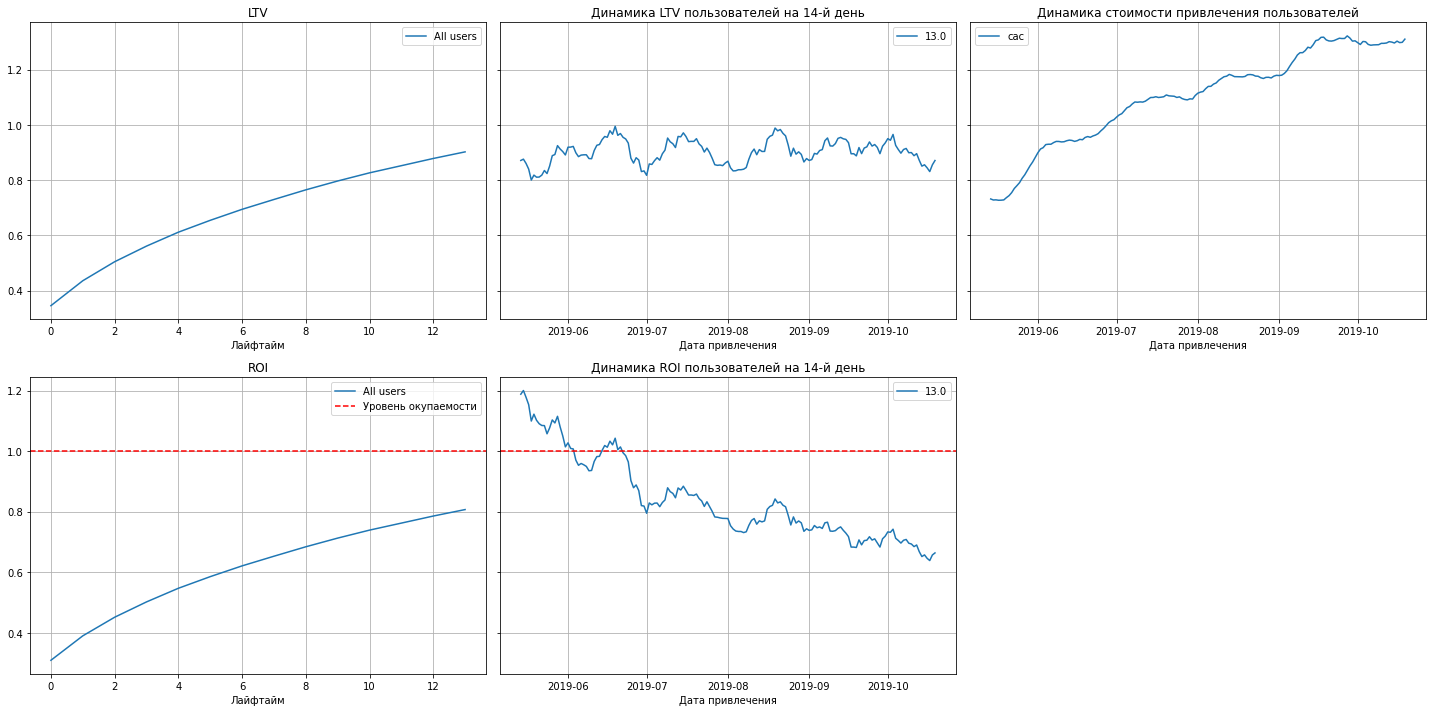

In [44]:
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### окупаемость рекламы
Так как ROI ниже 1, то рекламные затраты на привлечение не окупились.

Затраты растут, но роста LTV не дают. 

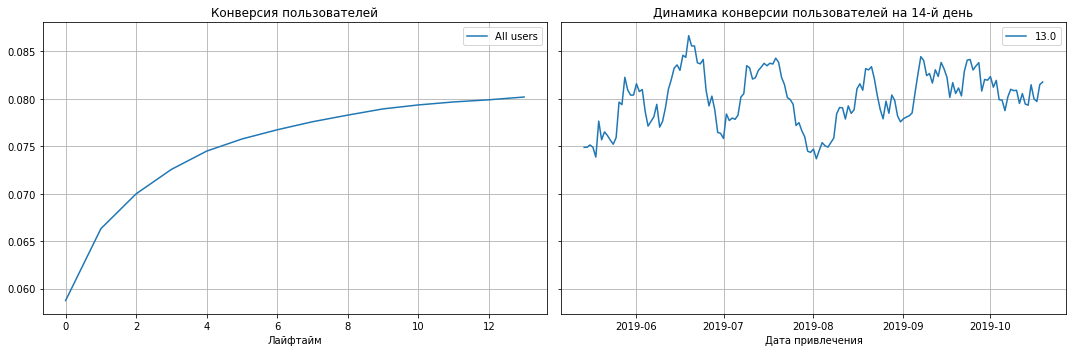

In [45]:
# Проверим конверсию пользователей и динамику её изменения. Построим и изучим графики конверсии и и динамику её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles.query('channel != "organic"'), orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

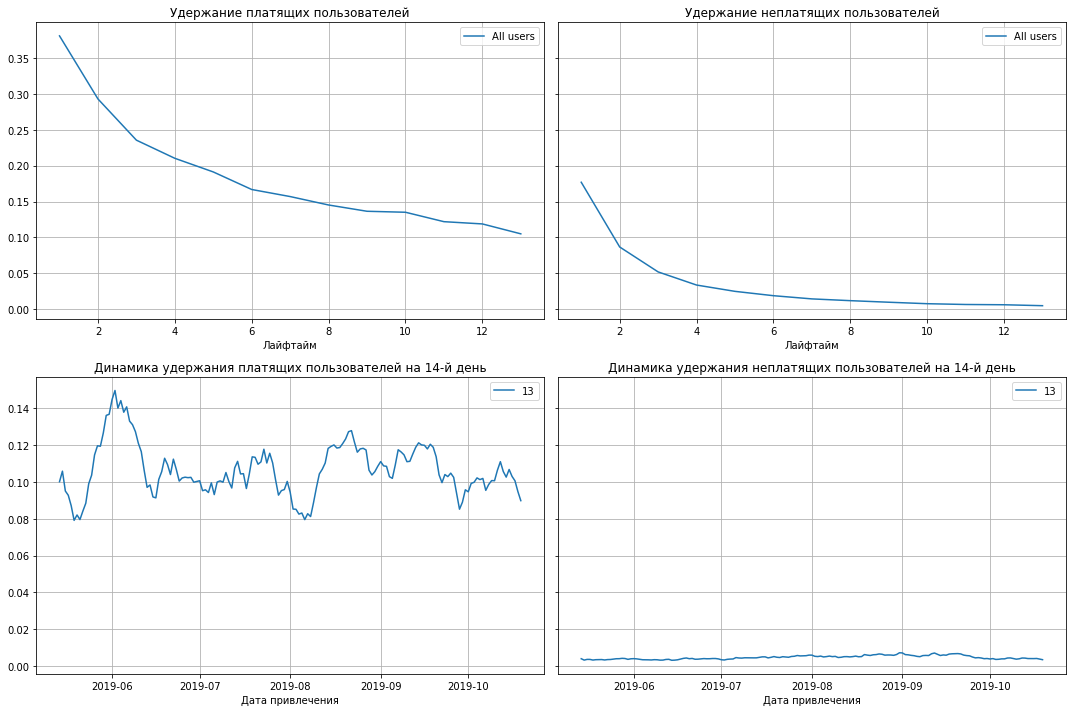

In [46]:
# Проверим удержание пользователей и динамику изменения. Построим и изучим графики удержание пользователей и динамику изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Конверсия и удержания пользователей
Динамика конверсии показывает, что она находится в пределах 7,5%-8,5% и рост затрат на рекламу не влияет.

Динамике удержания пользователей стабильна, хотя был рост во второй половине мая, что соотвествует началу роста рекламных затрат, в дальнейшем он вернулся в свои пределы. 

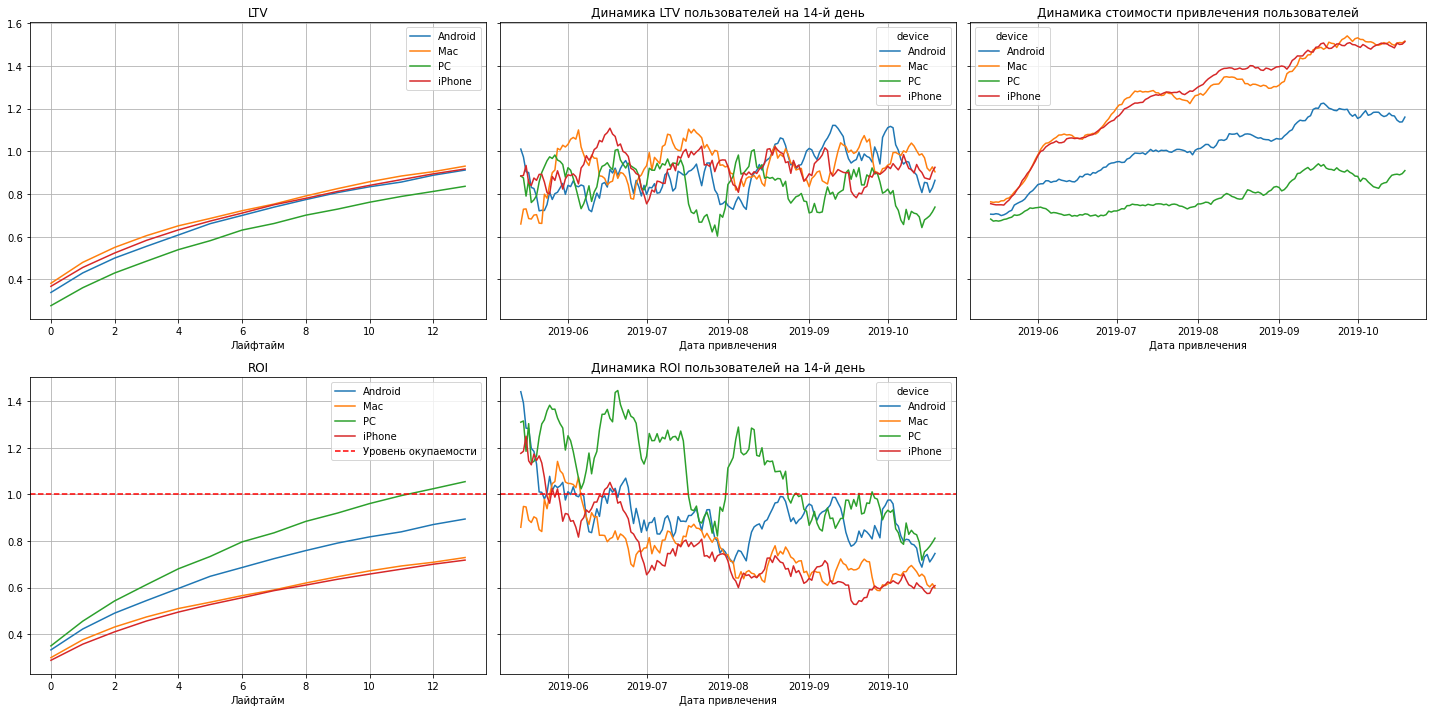

In [47]:
#Проанализируем окупаемость рекламы с разбивкой по устройствам. 
#Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device'],
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

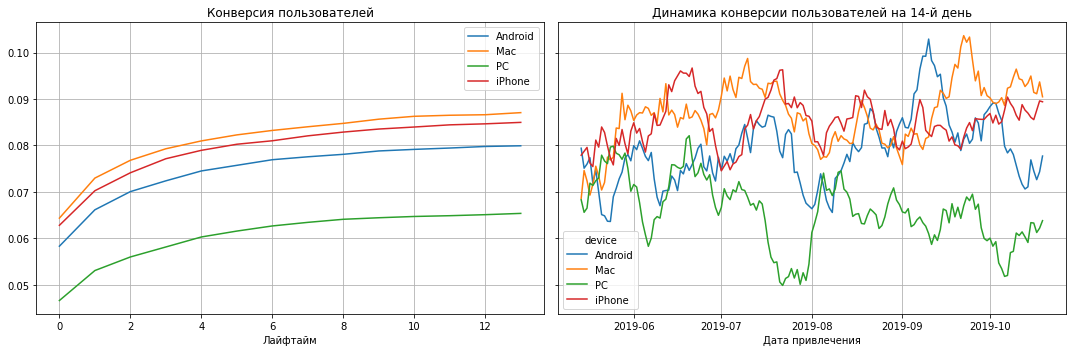

In [48]:
# Проверим конверсию пользователей и динамику её изменения. Построим и изучим графики конверсии и и динамику её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device'],)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

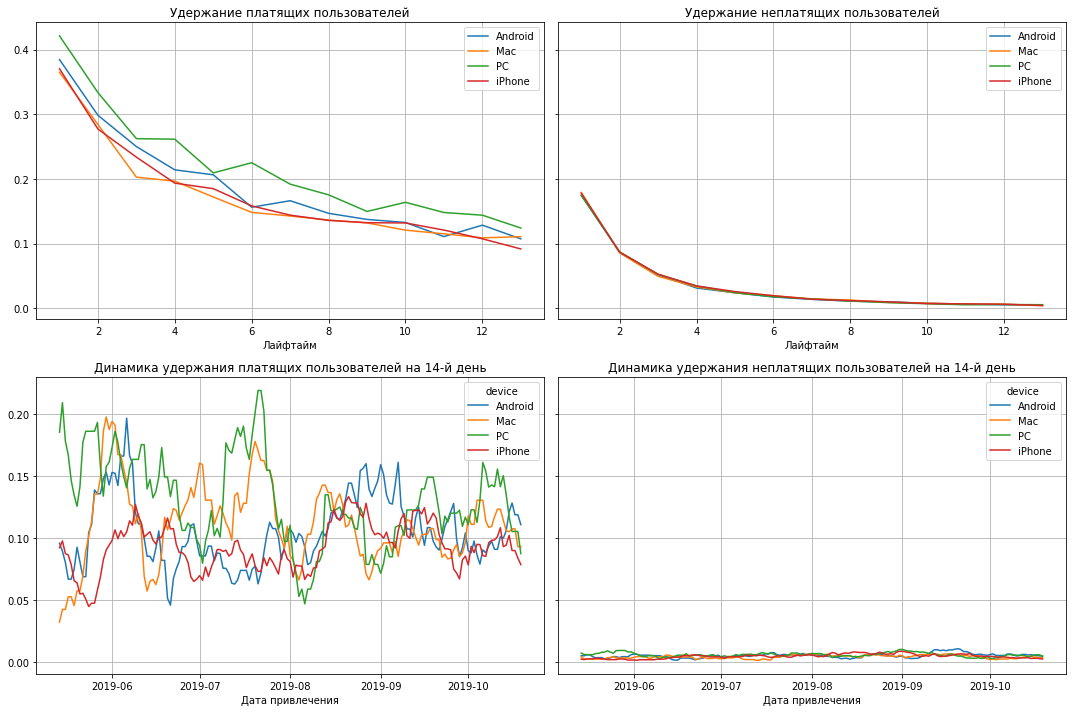

In [49]:
# Проверим удержание пользователей и динамику изменения. Построим и изучим графики удержание пользователей и динамику изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['device'],)

plot_retention(retention_grouped, retention_history, horizon_days)

#### окупаемость рекламы с разбивкой по устройствам
1. LTV практически ровный между устройствами, немного отстает PC
2. Окупается клиенты только с PC. 
3. Затраты растут на все устройства, но динамика роста выше всех у Mac и iPhone, на PC самые низкая динамика.
4. Роста LTV нет на всех устройствах.
5. ROI падает у пользователей на все устройствах, следствие роста затрат и стагнации LTV.  
6. Конверсия выше у Mac и iPhone, но на всех устройств привлечения новых клиентов практически нет с 6 лайфтайма
7. Удержание платящих клиентов практически равно на всех устройствах, динамика хаотична. 

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не растит LTV, необходимо изменить подход.
2. Снизить затраты на рекламу на всех устройствах, кроме PC.
3. Действия по рекламе необходимо сжать до 7 дней. 

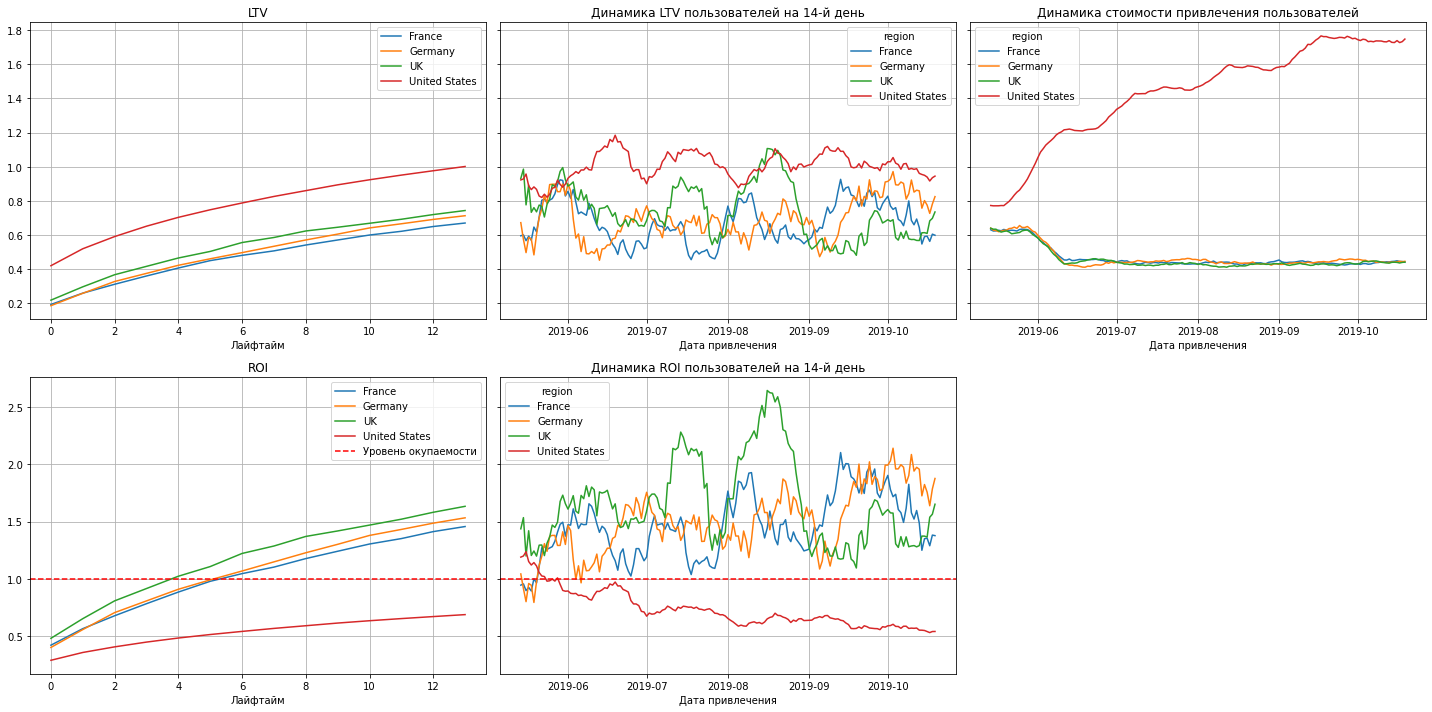

In [50]:
# Проанализируем окупаемость рекламы с разбивкой по странам.
# Построbv графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region'],
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

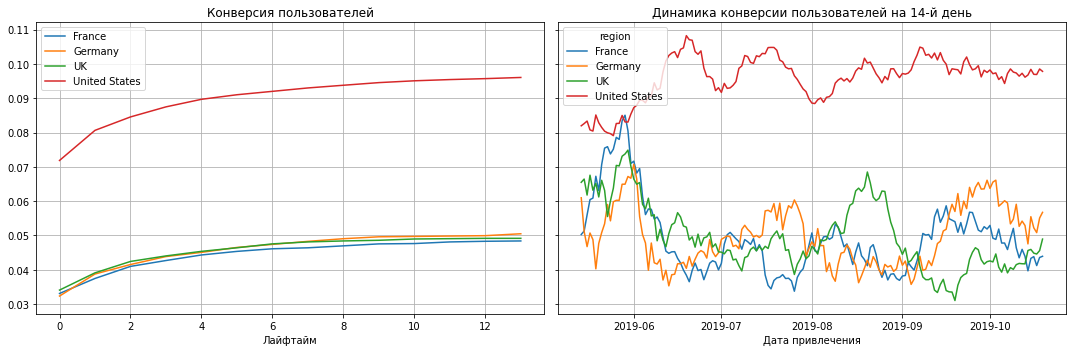

In [51]:
# Проверим конверсию пользователей и динамику её изменения. Построим и изучим графики конверсии и и динамику её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region'],)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

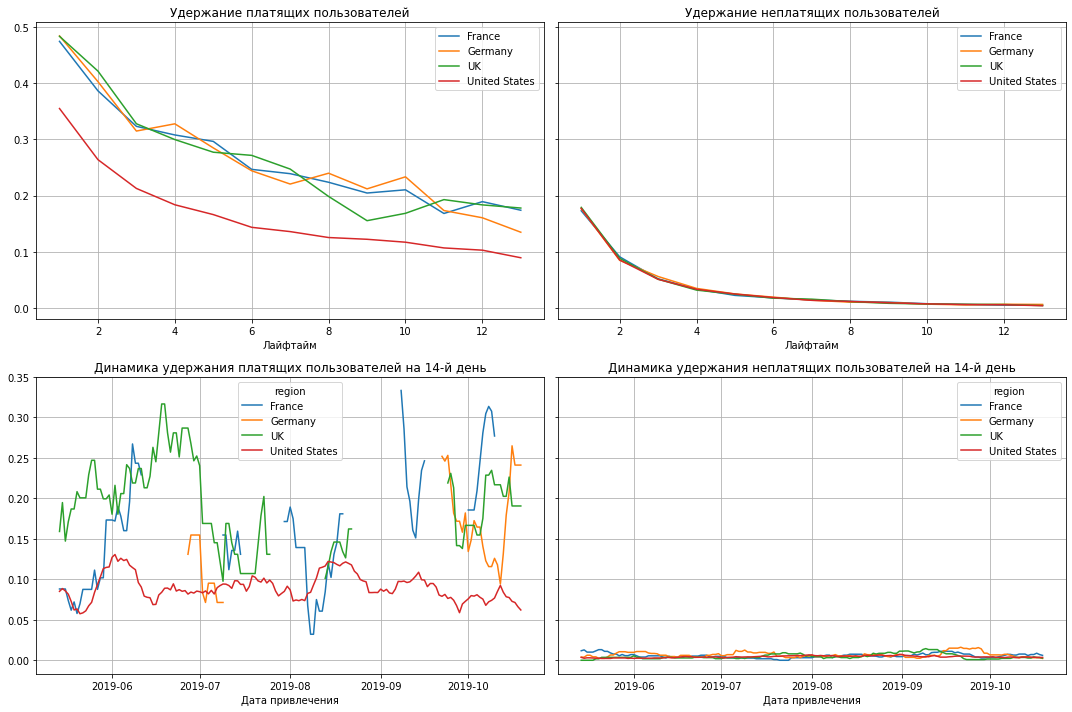

In [52]:
# Проверим удержание пользователей и динамику изменения. Построим и изучим графики удержание пользователей и динамику изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['region'],)

plot_retention(retention_grouped, retention_history, horizon_days)

#### окупаемость рекламы с разбивкой по странам.
1. LTV самый высокий у пользователей USA, остальные страны имеют равный LTV
2. Несмотря на самый самый высокий LTV у пользователей USA, они единственные не окупают затраты. Остальные страны окупают затраты со 4 по 6 лайфтайм. 
3. Затраты растут только на пользователей USA, у остальных стран сокращаются.
4. LTV стабильны во всех странах.
5. ROI падает у пользователей в USA, следствие роста затрат и стагнации LTV.  
6. Конверсия выше всех у USA в 2 раза, но затраты не растят конверсию. 
7. Удержание платящих клиентов самая низкая у USA 

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не растит LTV нигде, необходимо изменить подход. 
2. Снизить затраты на рекламу в USA
3. Рекламу в USA направить на удержание платящих клиентов. 

Графики для United States


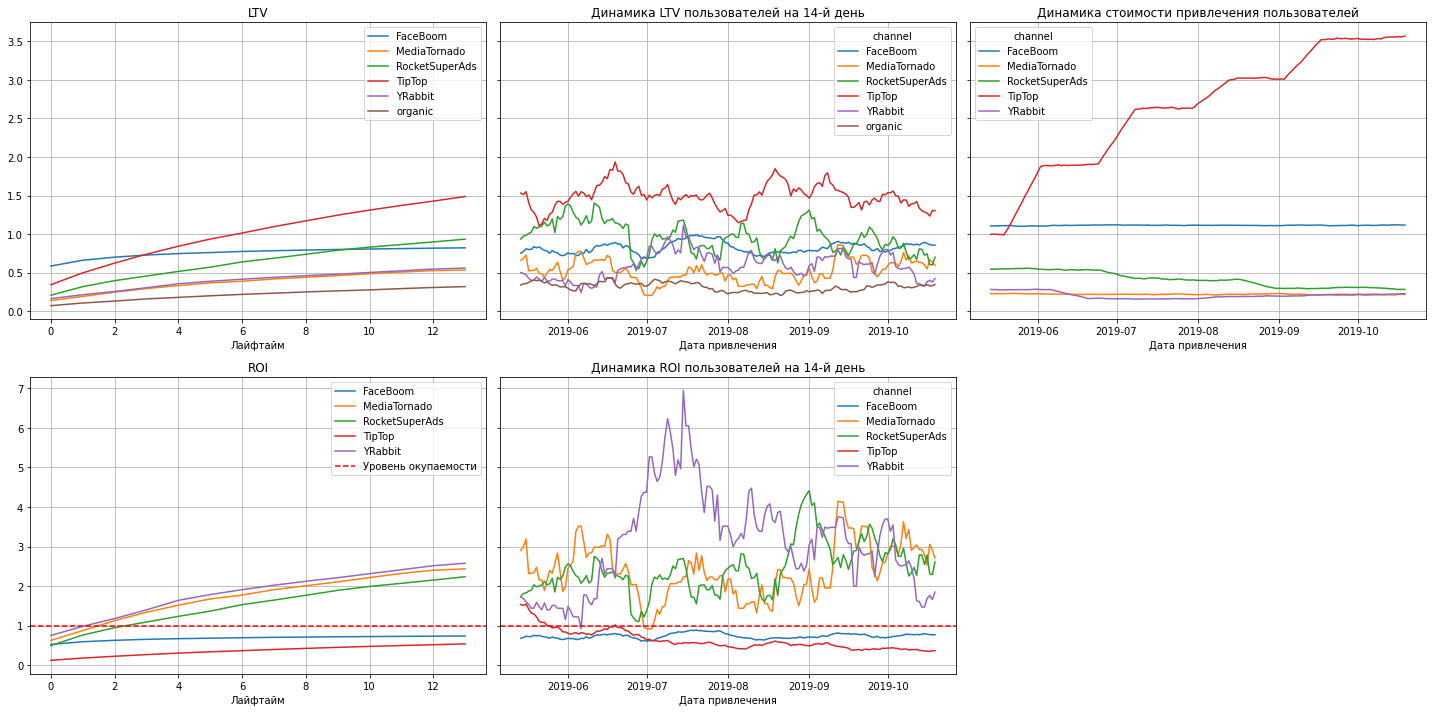

Графики для France


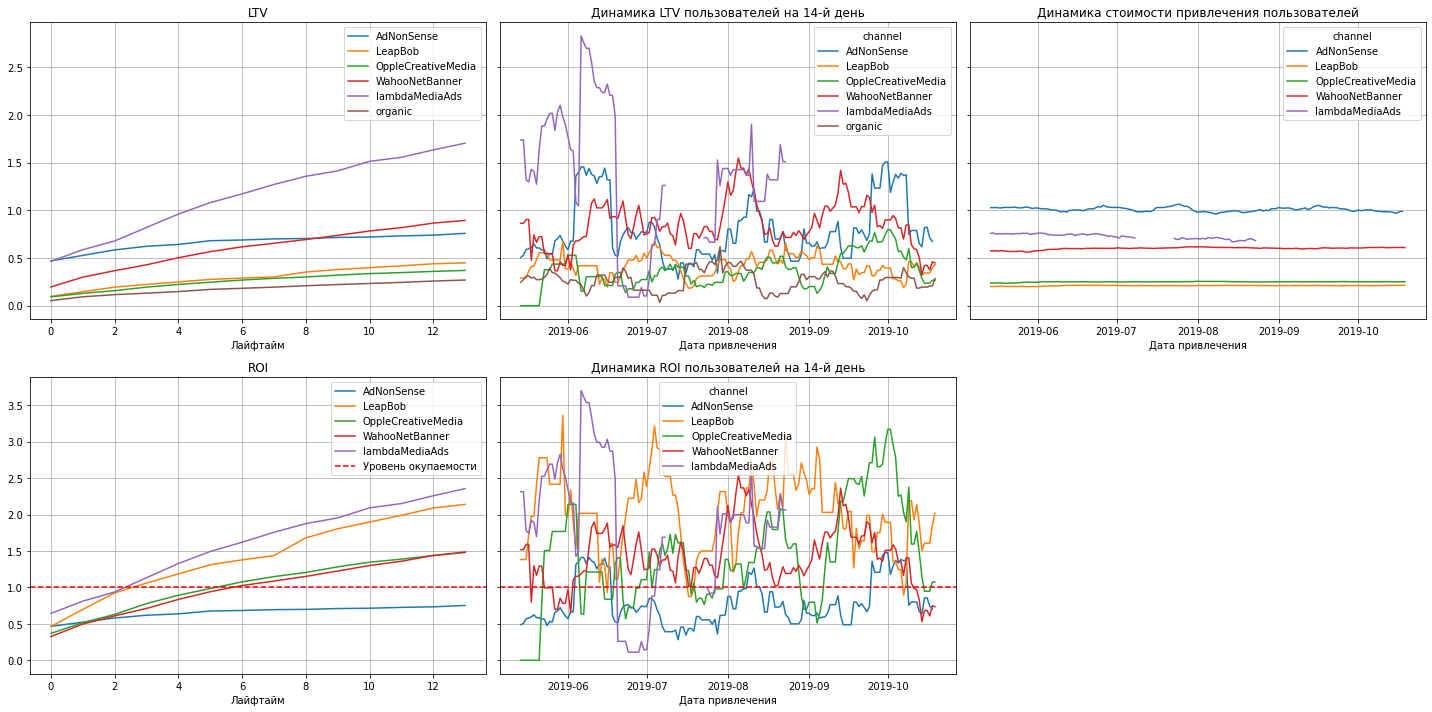

Графики для Germany


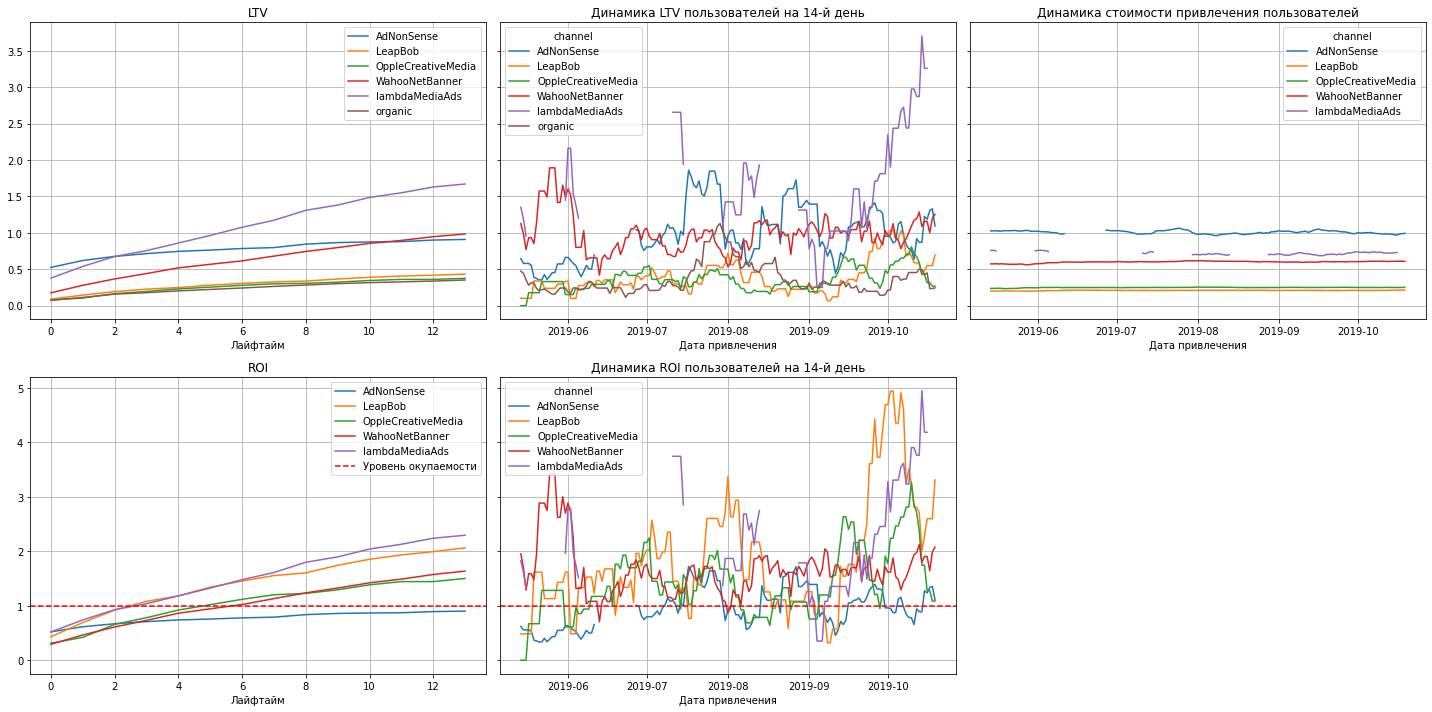

Графики для UK


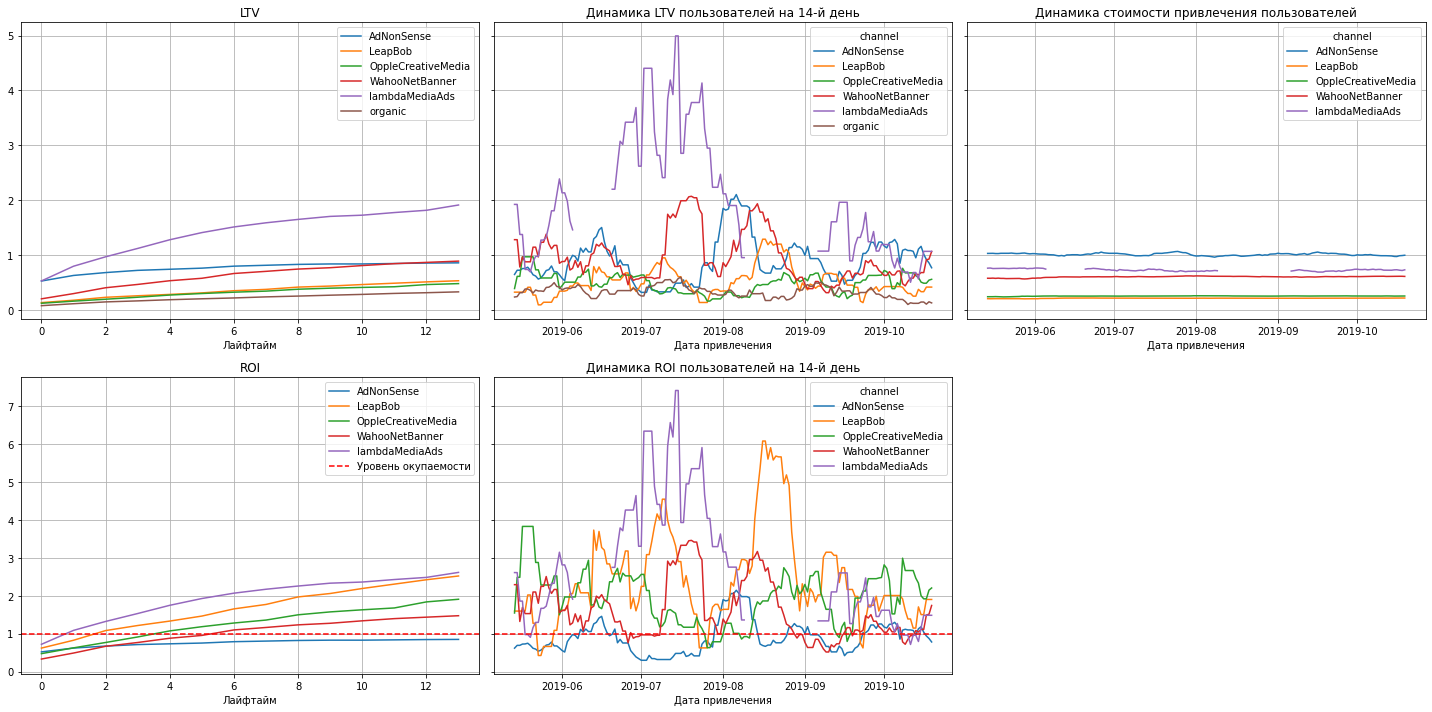

In [53]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
for reg in profiles['region'].unique():
    print('Графики для', reg)
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region == @reg'), orders, observation_date, horizon_days, dimensions=['channel'],
    )

    # строим графики
    plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

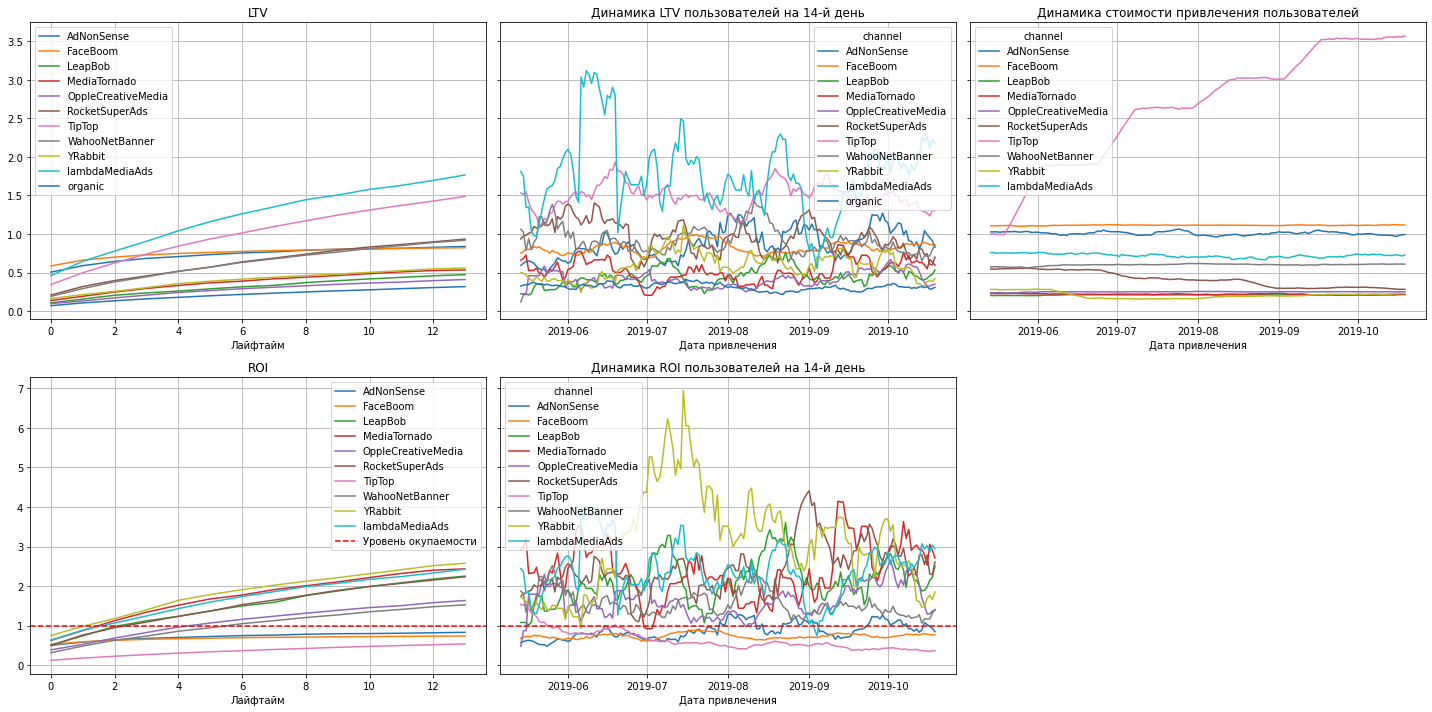

In [54]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'],
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

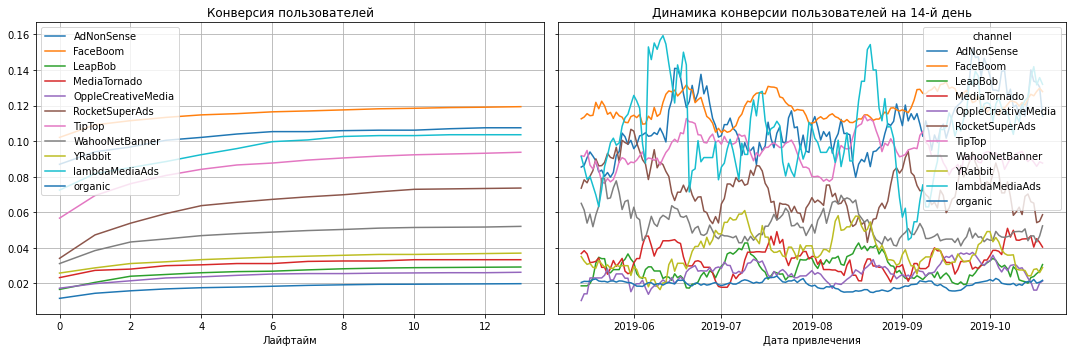

In [55]:
# Проверим конверсию пользователей и динамику её изменения по каналам. Построим и изучим графики конверсии и и динамику её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
profiles, orders, observation_date, horizon_days, dimensions=['channel'],)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

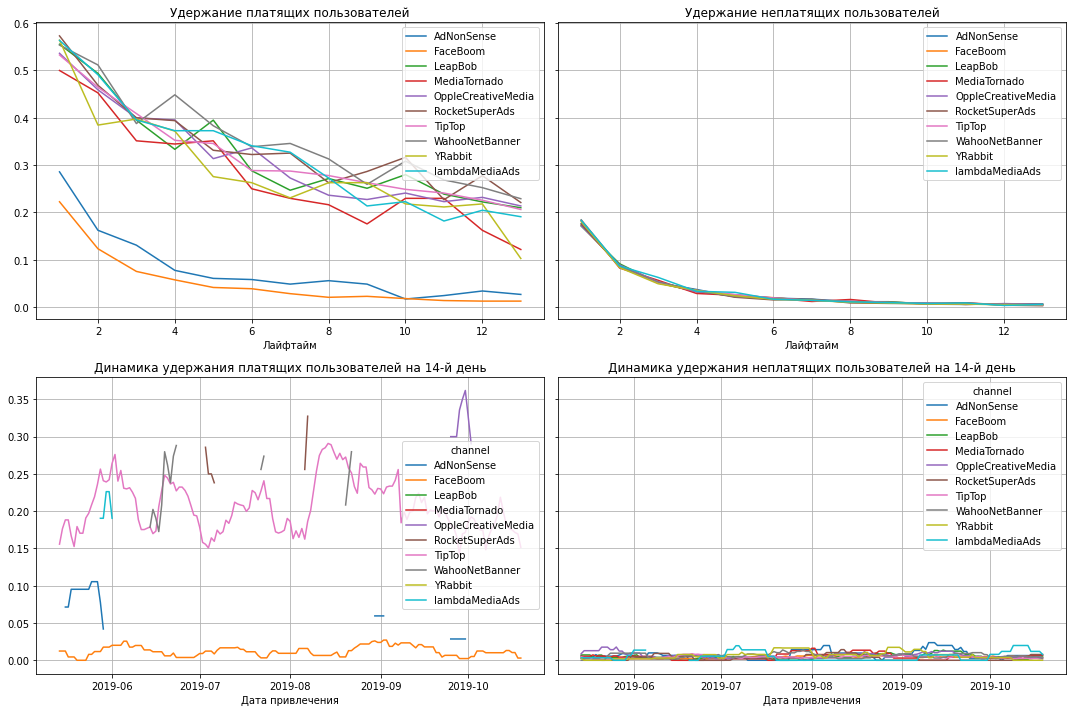

In [56]:
# Проверим удержание пользователей и динамику изменения. Построим и изучим графики удержание пользователей и динамику изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['channel'],)

plot_retention(retention_grouped, retention_history, horizon_days)

#### окупаемость рекламы с разбивкой по рекламным каналам
1. LTV самый высокий у пользователей c рекламных источников lambdaMediaAds и TipTop
2. Все источники окупаются, кроме трех: AdNonSense, FaceBoom и TipTop. 
3. Затраты растут только на источник TipTop, остальные имеют постоянный размер затрат.
4. Затраты на рекламные источники не влияет на LTV.
5. ROI постоянно ниже у источников: AdNonSense, FaceBoom и TipTop.  
6. Конверсия высокая у AdNonSense, FaceBoom и lambdaMediaAds
7. Удержание платящих клиентов низкое у AdNonSense и FaceBoom

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не влияет на LTV в рекламных каналах, необходимо изменить подход.
2. Обратить внимание на неокупающие себя каналы: AdNonSense, FaceBoom и TipTop:
    1. Направить силы на удержание платящих клиентов у AdNonSense и FaceBoom
    2. Снизить CAC у TipTop
3. Обратить внимание на lambdaMediaAds, при отстутствии роста затрат растет LTV, а следовательно быстрота окупаемости.

### Выводы

#### окупаемость рекламы
Так как ROI ниже 1, то рекламные затраты на привлечение не окупились.

Затраты растут, но роста LTV не дают. 

#### Конверсия и удержания пользователей
Динамика конверсии показывает, что она находится в пределах 7,5%-8,5% и рост затрат на рекламу не влияет.

Динамике удержания пользователей стабильна, хотя был рост во второй половине мая, что соотвествует началу роста рекламных затрат, в дальнейшем он вернулся в свои пределы. 


#### окупаемость рекламы с разбивкой по устройствам
1. LTV практически ровный между устройствами, немного отстает PC
2. Окупается клиенты только с PC. 
3. Затраты растут на все устройства, но динамика роста выше всех у Mac и iPhone, на PC самые низкая динамика.
4. Роста LTV нет на всех устройствах.
5. ROI падает у пользователей на все устройствах, следствие роста затрат и стагнации LTV.  
6. Конверсия выше у Mac и iPhone, но на всех устройств привлечения новых клиентов практически нет с 6 лайфтайма
7. Удержание платящих клиентов практически равно на всех устройствах, динамика хаотична. 

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не растит LTV, необходимо изменить подход.
2. Снизить затраты на рекламу на всех устройствах, кроме PC.
3. Действия по рекламе для новых клиентов необходимо сжать до 7 дней.  

#### окупаемость рекламы с разбивкой по странам.
1. LTV самый высокий у пользователей USA, остальные страны имеют равный LTV
2. Несмотря на самый самый высокий LTV у пользователей USA, они единственные не окупают затраты. Остальные страны окупают затраты со 4 по 6 лайфтайм. 
3. Затраты растут только на пользователей USA, у остальных стран сокращаются.
4. LTV стабильны во всех странах.
5. ROI падает у пользователей в USA, следствие роста затрат и стагнации LTV.  
6. Конверсия выше всех у USA в 2 раза, но затраты не растят конверсию. 
7. Удержание платящих клиентов самая низкая у USA 

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не растит LTV нигде, необходимо изменить подход. 
2. Снизить затраты на рекламу в USA
3. Рекламу в USA направить на удержание платящих клиентов. 

#### окупаемость рекламы с разбивкой по рекламным каналам
1. LTV самый высокий у пользователей c рекламных источников lambdaMediaAds и TipTop
2. Все источники окупаются, кроме трех: AdNonSense, FaceBoom и TipTop. 
3. Затраты растут только на источник TipTop, остальные имеют постоянный размер затрат.
4. Затраты на рекламные источники не влияет на LTV.
5. ROI постоянно ниже у источников: AdNonSense, FaceBoom и TipTop.  
6. Конверсия высокая у AdNonSense, FaceBoom и lambdaMediaAds
7. Удержание платящих клиентов низкое у AdNonSense и FaceBoom

Рекомендации для рекламного отдела:
1. Текущая рекламная камнания не влияет на LTV в рекламных каналах, необходимо изменить подход.
2. Обратить внимание на неокупающие себя каналы: AdNonSense, FaceBoom и TipTop:
    1. Направить силы на удержание платящих клиентов у AdNonSense и FaceBoom
    2. Снизить CAC у TipTop
3. Обратить внимание на lambdaMediaAds, при отстутствии роста затрат растет LTV, а следовательно быстрота окупаемости.